<a href="https://colab.research.google.com/github/attariumair/data_science-assignments/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = yf.download("GOOGL")


/tmp/ipython-input-1062306094.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("GOOGL")
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.index = pd.to_datetime(data.index)


In [ ]:
print("Summary Statistics:")
print(data.describe())


Summary Statistics:
Price        Close        High         Low        Open        Volume
Ticker       GOOGL       GOOGL       GOOGL       GOOGL         GOOGL
count    23.000000   23.000000   23.000000   23.000000  2.300000e+01
mean    275.694348  279.434782  271.753045  275.450868  3.596721e+07
std      13.168982   14.195996   12.782891   13.262636  1.267070e+07
min     250.460007  254.880005  244.149994  252.979996  1.984210e+07
25%     268.369995  270.435013  265.389999  266.285004  2.952565e+07
50%     278.829987  283.779999  277.029999  282.179993  3.164720e+07
75%     284.529999  289.799988  280.600006  285.554993  4.142410e+07
max     293.739990  303.679993  287.320007  291.679993  7.487600e+07


In [ ]:
print("\nData Types:")
print(data.dtypes)



Data Types:
Price   Ticker
Close   GOOGL     float64
High    GOOGL     float64
Low     GOOGL     float64
Open    GOOGL     float64
Volume  GOOGL       int64
dtype: object


In [ ]:
data.head()


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2025-10-20,256.549988,257.329987,254.229996,254.690002,22350200
2025-10-21,250.460007,254.880005,244.149994,254.740005,47312100
2025-10-22,251.690002,256.359985,249.289993,254.369995,35029400
2025-10-23,253.080002,255.039993,251.850006,252.979996,19901400
2025-10-24,259.920013,261.679993,255.320007,256.579987,28655100


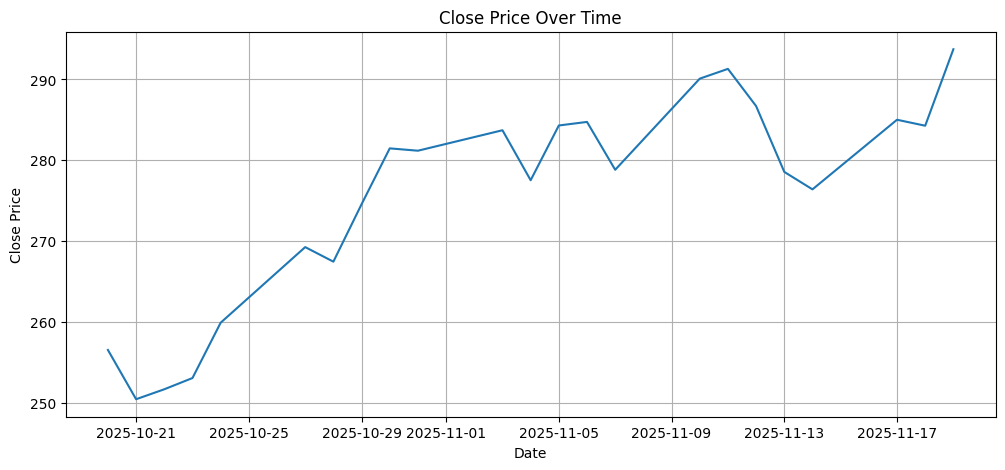

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(data.index, data['Close'])
plt.title("Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


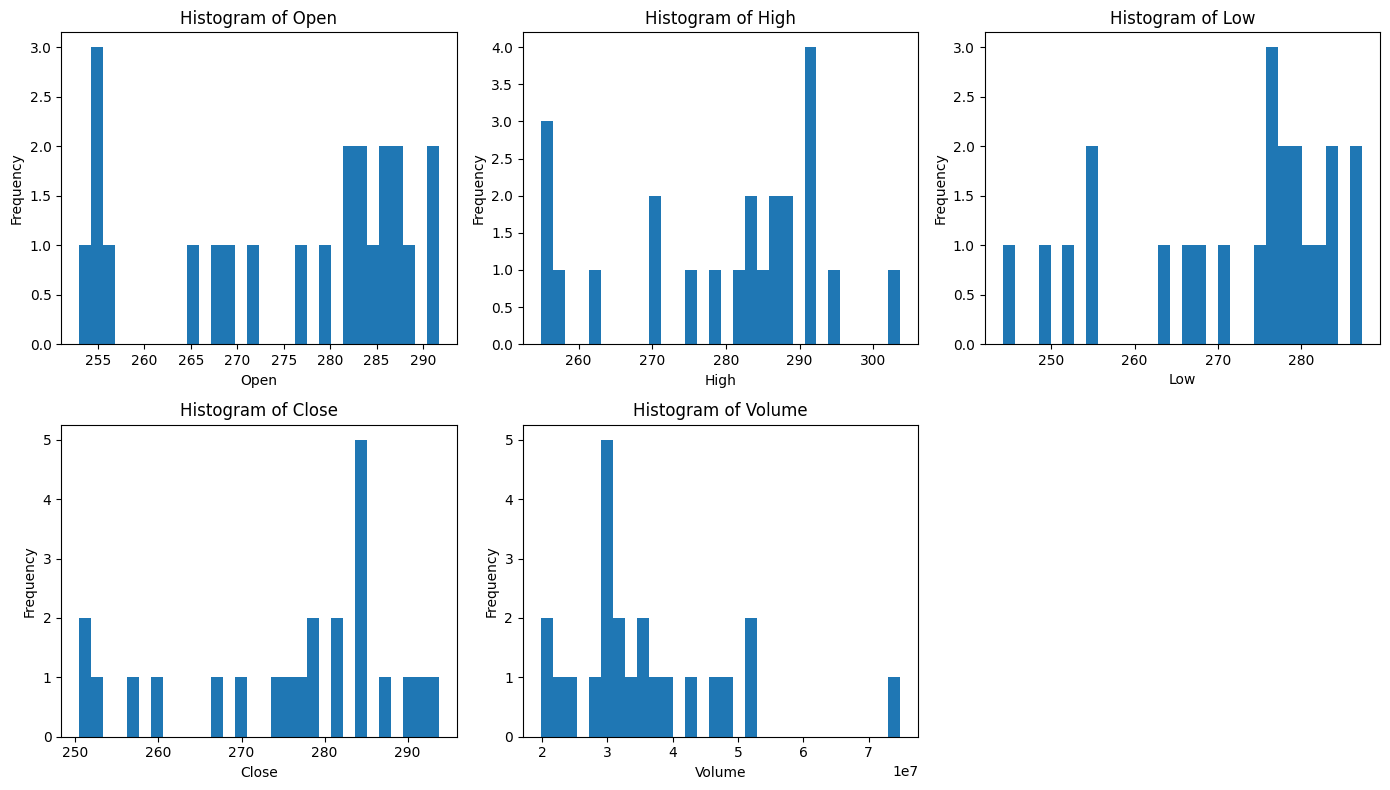

In [ ]:
import matplotlib.pyplot as plt

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(14,8))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    plt.hist(data[col], bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
data['MA7'] = data['Close'].rolling(window=7).mean()
data[['Close', 'MA7']].head()



Price,Close,MA7
Ticker,GOOGL,
Date,,
2025-10-20,256.549988,NaN
2025-10-21,250.460007,NaN
2025-10-22,251.690002,NaN
2025-10-23,253.080002,NaN
2025-10-24,259.920013,NaN


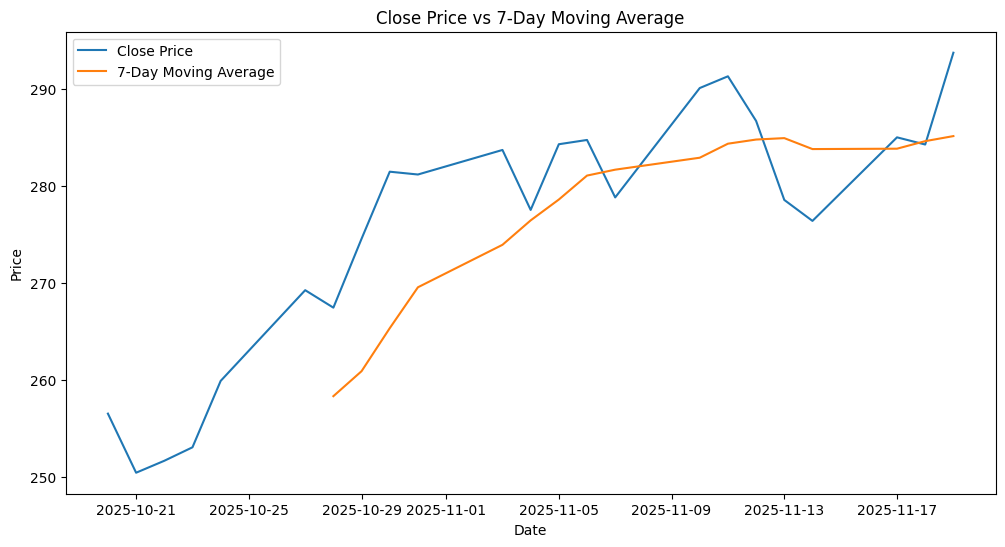

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA7'], label='7-Day Moving Average')

plt.title("Close Price vs 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


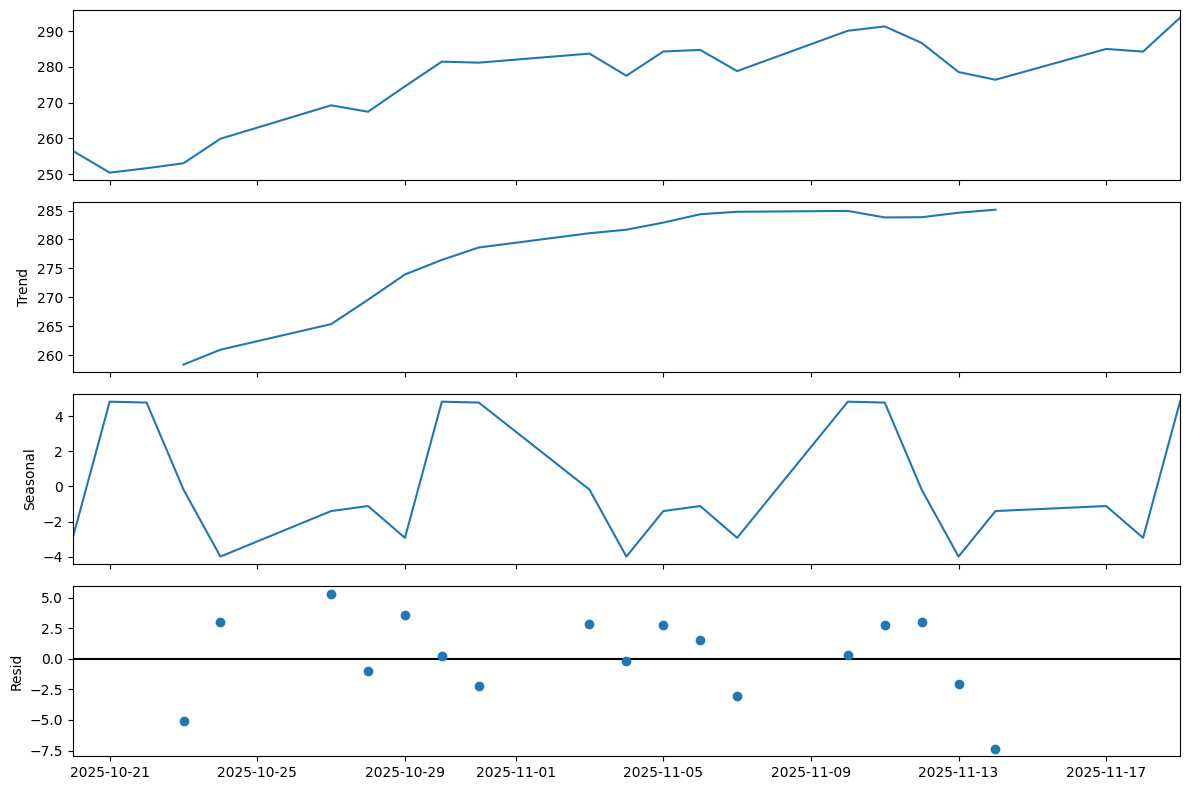

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Close column ko select kar ke NaN remove karen
ts = data['Close'].dropna()

# Chhota period (weekly, 7 days)
result = seasonal_decompose(ts, model='additive', period=7)

# Plot Trend, Seasonality, Residuals
plt.rcParams["figure.figsize"] = (12,8)
result.plot()
plt.show()


In [ ]:
data.shape


(23, 6)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Volume column select karen
ts = data['Volume'].dropna()

# ADF Test
result = adfuller(ts)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -3.0697189847562933
p-value: 0.02887680121638957
Critical Values:
   1%: -3.769732625845229
   5%: -3.005425537190083
   10%: -2.6425009917355373


In [ ]:
data['Volume_diff'] = data['Volume'].diff()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
# Close price series
ts = data['Close'].dropna()


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(ts)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -5.109534612918109
p-value: 1.3413144421810745e-05


In [ ]:
if adf_result[1] > 0.05:
    ts_diff = ts.diff().dropna()
else:
    ts_diff = ts


In [ ]:
# ARIMA order: (p,d,q)
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  GOOGL   No. Observations:                   23
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -70.559
Date:                Wed, 19 Nov 2025   AIC                            147.118
Time:                        20:32:41   BIC                            150.391
Sample:                    10-20-2025   HQIC                           147.889
                         - 11-19-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0515     20.402     -0.003      0.998     -40.038      39.935
ma.L1          0.0393     20.411      0.002      0.998     -39.966      40.044
sigma2        35.7505     15.888      2.250      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [ ]:
forecast = model_fit.forecast(steps=7)
print("Forecasted Close Prices for next 7 days:")
print(forecast)


Forecasted Close Prices for next 7 days:
2025-11-20    293.624443
2025-11-21    293.630393
2025-11-24    293.630086
2025-11-25    293.630102
2025-11-26    293.630101
2025-11-27    293.630101
2025-11-28    293.630101
Freq: B, Name: predicted_mean, dtype: float64


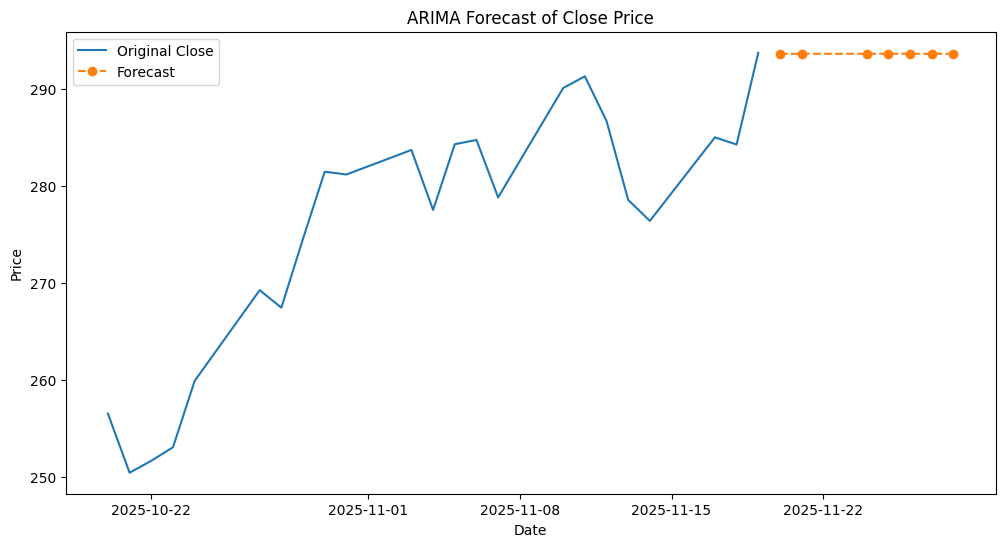

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ts, label='Original Close')
plt.plot(forecast.index, forecast, label='Forecast', marker='o', linestyle='--')
plt.title("ARIMA Forecast of Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
train = ts[:-7]
test = ts[-7:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
pred = model_fit.forecast(steps=7)

mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 5.9304500236887145
RMSE: 6.996262907799239


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error


In [ ]:
# Ensure DateTime index
ts_close = data['Close'].dropna()

# ARIMA(1,0,0)
model_close = ARIMA(ts_close, order=(1,0,0))
model_close_fit = model_close.fit()
print(model_close_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  GOOGL   No. Observations:                   23
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -74.373
Date:                Wed, 19 Nov 2025   AIC                            154.746
Time:                        20:35:50   BIC                            158.153
Sample:                    10-20-2025   HQIC                           155.603
                         - 11-19-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        275.4212     10.544     26.120      0.000     254.755     296.088
ar.L1          0.9190      0.127      7.259      0.000       0.671       1.167
sigma2        34.7575     15.330      2.267      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [ ]:
ts_volume = data['Volume'].dropna()

# ARIMA(1,0,0) on Volume
model_volume = ARIMA(ts_volume, order=(1,0,0))
model_volume_fit = model_volume.fit()

# Forecast next 30 steps
forecast_volume = model_volume_fit.forecast(steps=30)
print("Forecasted Volume for next 30 days:")
print(forecast_volume)


Forecasted Volume for next 30 days:
2025-11-20    4.142423e+07
2025-11-21    3.787549e+07
2025-11-24    3.663452e+07
2025-11-25    3.620057e+07
2025-11-26    3.604881e+07
2025-11-27    3.599575e+07
2025-11-28    3.597719e+07
2025-12-01    3.597070e+07
2025-12-02    3.596843e+07
2025-12-03    3.596764e+07
2025-12-04    3.596736e+07
2025-12-05    3.596726e+07
2025-12-08    3.596723e+07
2025-12-09    3.596722e+07
2025-12-10    3.596721e+07
2025-12-11    3.596721e+07
2025-12-12    3.596721e+07
2025-12-15    3.596721e+07
2025-12-16    3.596721e+07
2025-12-17    3.596721e+07
2025-12-18    3.596721e+07
2025-12-19    3.596721e+07
2025-12-22    3.596721e+07
2025-12-23    3.596721e+07
2025-12-24    3.596721e+07
2025-12-25    3.596721e+07
2025-12-26    3.596721e+07
2025-12-29    3.596721e+07
2025-12-30    3.596721e+07
2025-12-31    3.596721e+07
Freq: B, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


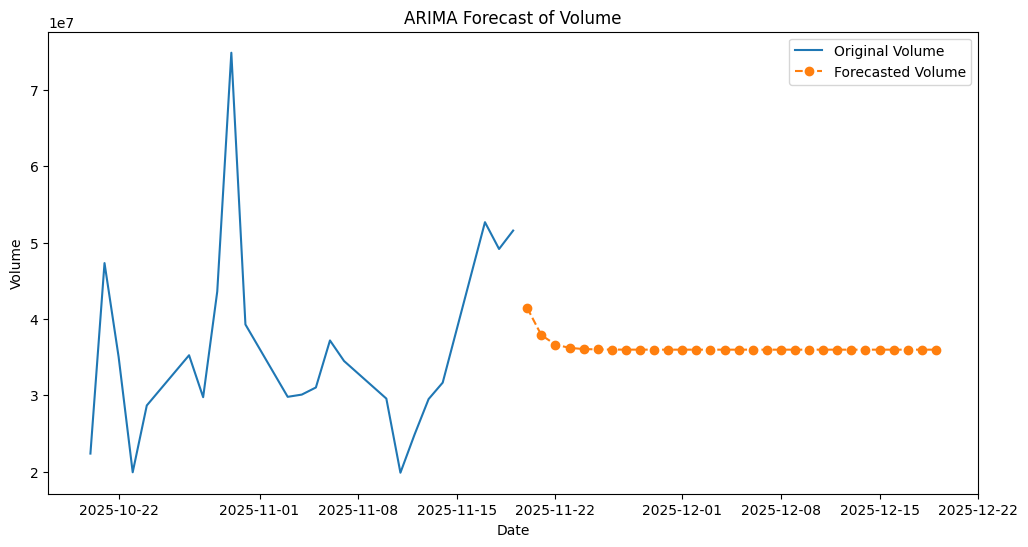

In [ ]:
plt.figure(figsize=(12,6))

# Original Volume
plt.plot(ts_volume.index, ts_volume, label='Original Volume')

# Forecast (future points)
forecast_index = pd.date_range(start=ts_volume.index[-1] + pd.Timedelta(days=1), periods=30)
plt.plot(forecast_index, forecast_volume, label='Forecasted Volume', linestyle='--', marker='o')

plt.title("ARIMA Forecast of Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()


In [ ]:
# Small dataset, use last 5 as test
train = ts_volume[:-5]
test = ts_volume[-5:]

model_eval = ARIMA(train, order=(1,0,0)).fit()
pred = model_eval.forecast(steps=5)

mae = mean_absolute_error(test, pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 11104526.981059287


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
